In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
datagro = pd.read_excel("datagro1.xlsx")


In [3]:


datagro.head()



,temperatura,chuva,irrigação,produção,tipo de solo_arenoso,tipo de solo_argiloso,tipo de solo_calcário,espécie cultivada_arroz,espécie cultivada_milho,espécie cultivada_trigo,pesticidas_não,pesticidas_sim
0,286.824290,935.063311,0,2040.639636,0,0,1,0,1,0,0,1
1,334.940685,944.807271,1,2222.992475,1,0,0,0,0,1,0,1
2,292.281313,738.401869,0,1881.337847,1,0,0,1,0,0,1,0
3,213.694023,1172.342037,0,1705.096552,1,0,0,0,0,1,0,1
4,240.886027,975.783799,0,2102.333891,0,1,0,0,0,1,0,1


In [4]:
datagro.columns


Index(['temperatura', 'chuva', 'irrigação', 'produção', 'tipo de solo_arenoso',
       'tipo de solo_argiloso', 'tipo de solo_calcário',
       'espécie cultivada_arroz', 'espécie cultivada_milho',
       'espécie cultivada_trigo', 'pesticidas_não', 'pesticidas_sim'],
      dtype='object')

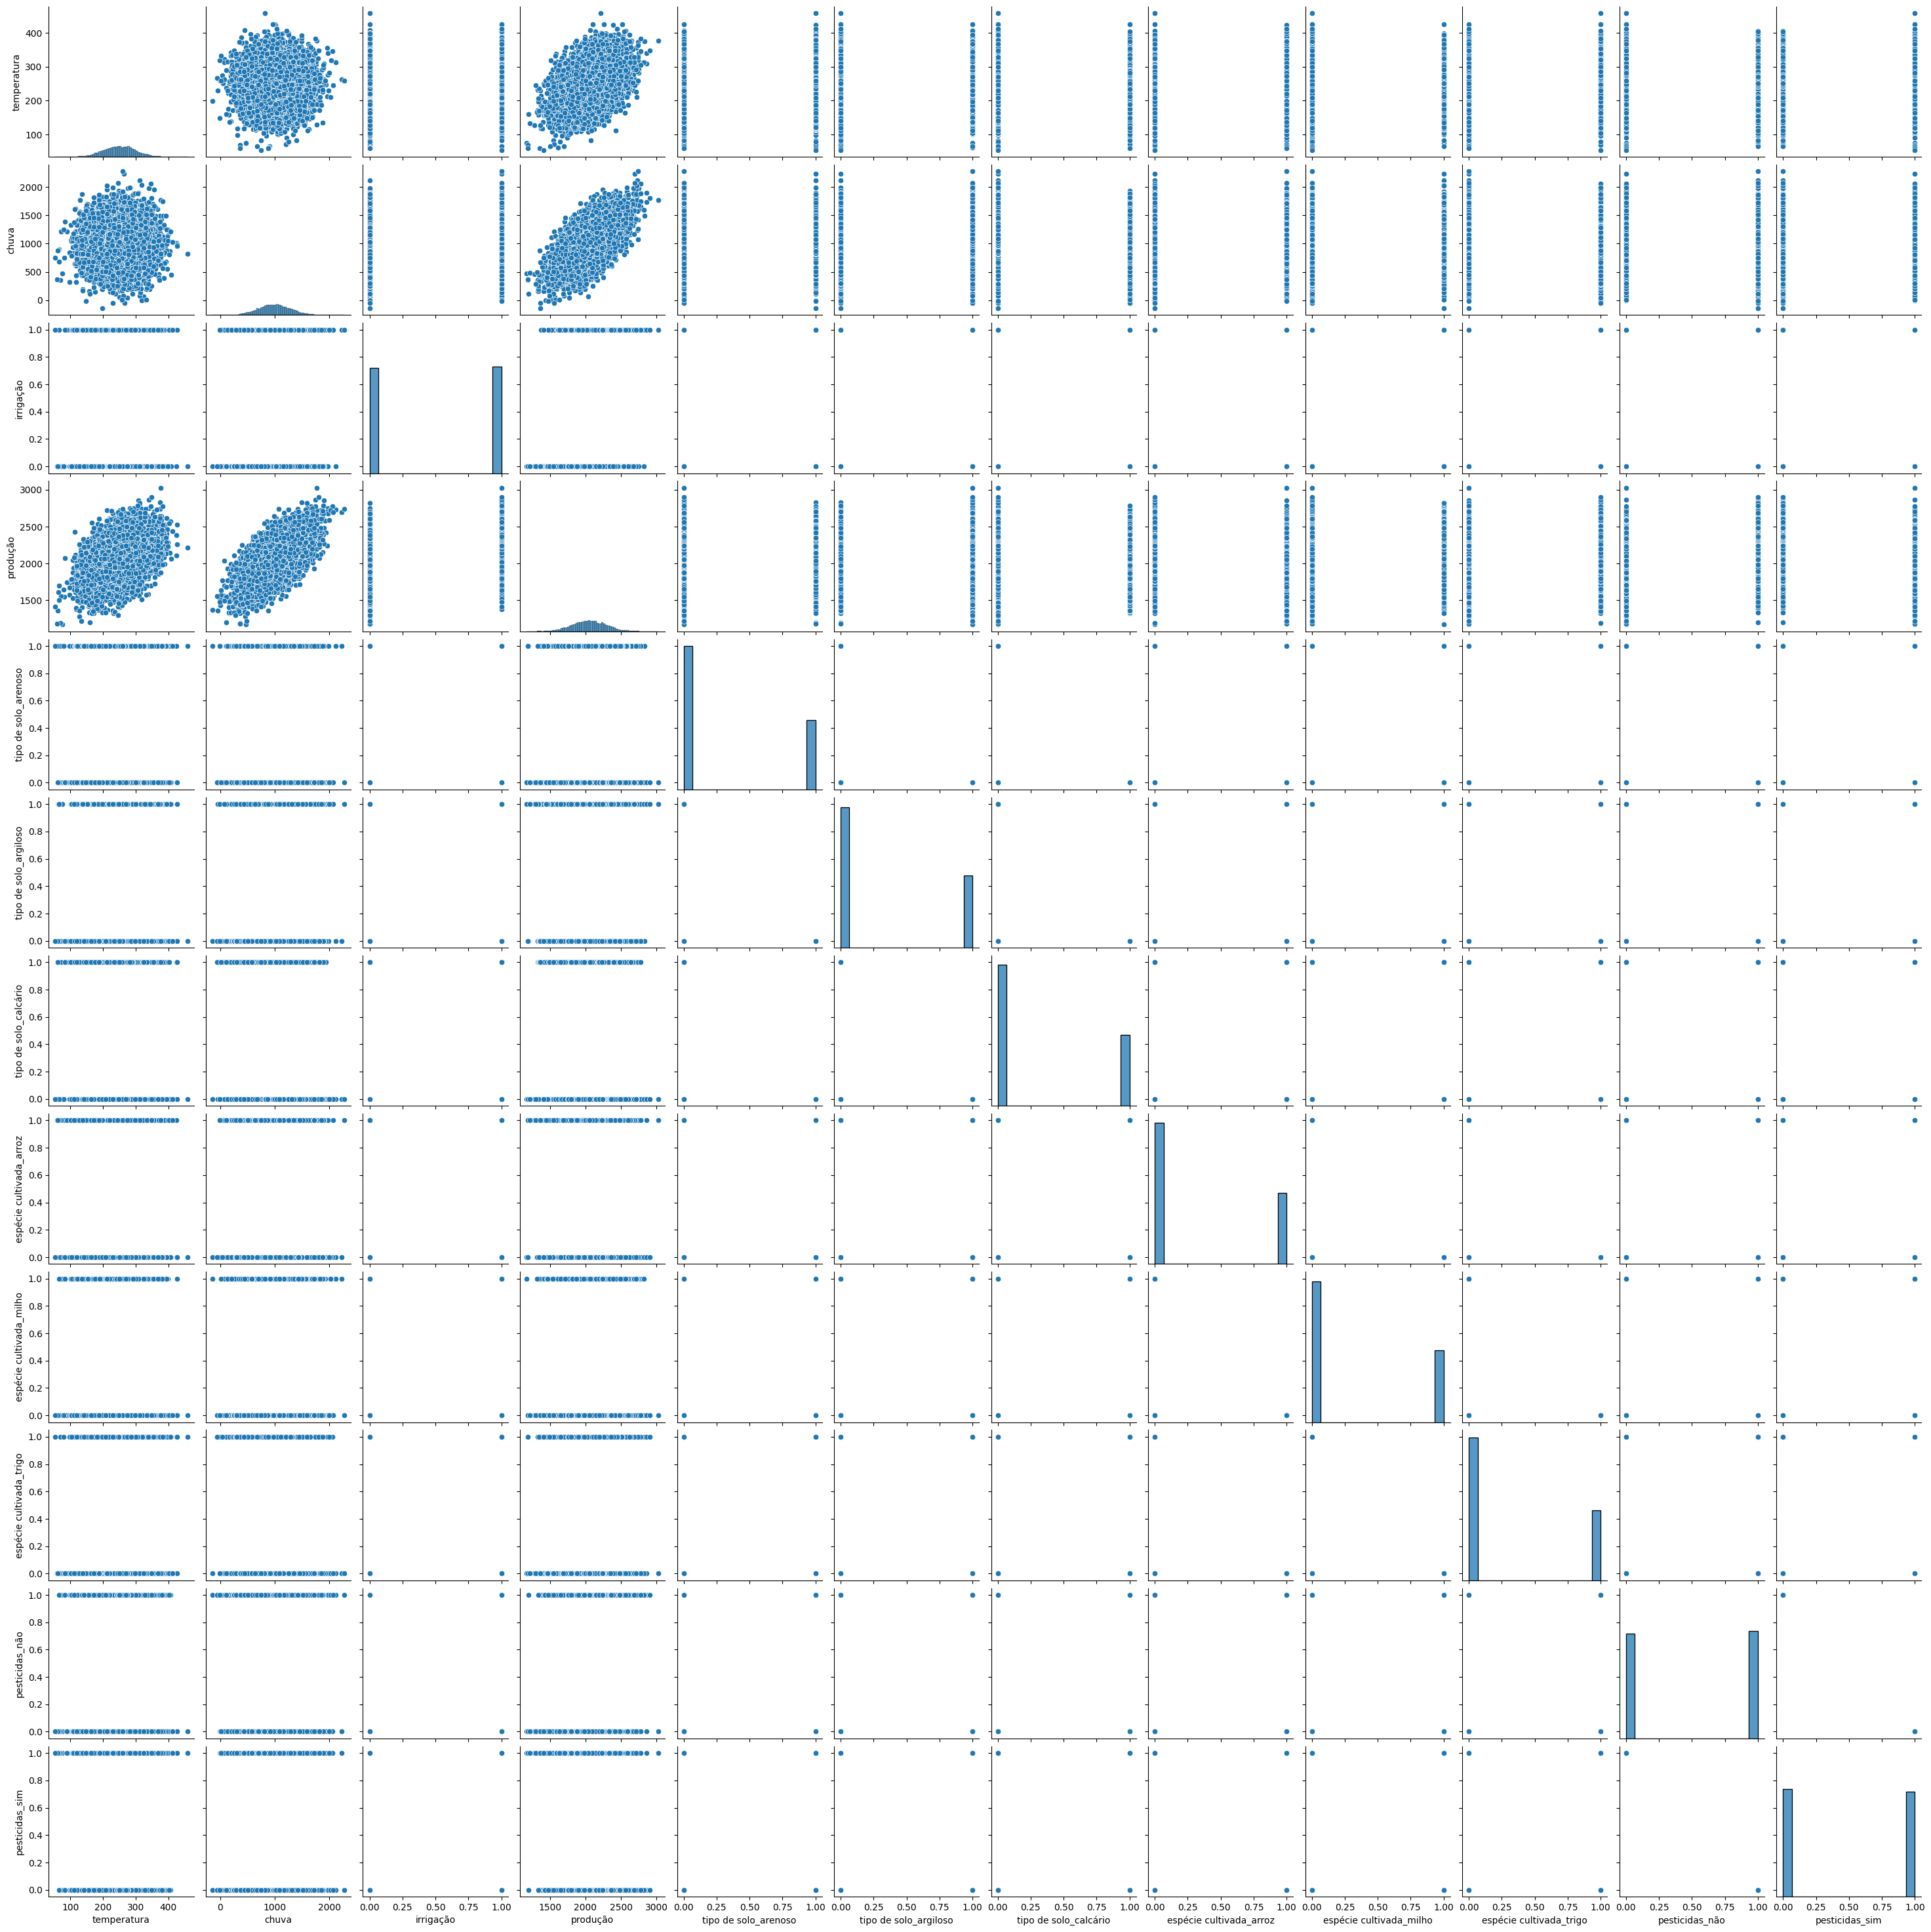

In [5]:


sns.pairplot(datagro)


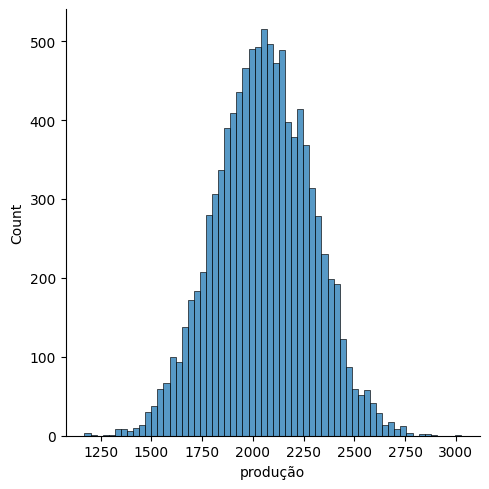

In [6]:
sns.displot(datagro['produção'])

<Axes: >

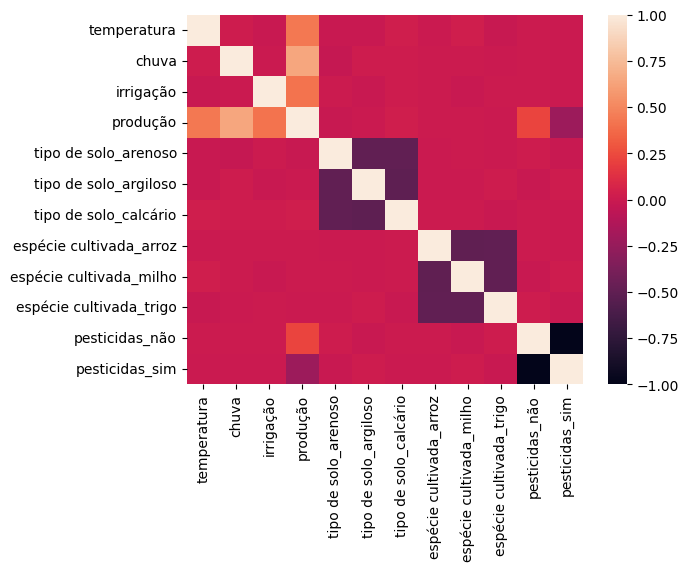

In [7]:


sns.heatmap(datagro.corr(), annot=None)



In [8]:
X = datagro[['temperatura', 'chuva', 'irrigação','tipo de solo_arenoso',
       'tipo de solo_argiloso', 'tipo de solo_calcário',
       'espécie cultivada_arroz', 'espécie cultivada_milho',
       'espécie cultivada_trigo', 'pesticidas_não', 'pesticidas_sim']]

y = datagro['produção']

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.1, random_state=None)

In [20]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()







In [21]:


lr.fit(X_train,y_train)



LinearRegression()

In [22]:
print(lr.intercept_)

940.7670408756062


In [23]:
coeff_df = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
temperatura,2.028868
chuva,0.509277
irrigação,193.584710
tipo de solo_arenoso,-4.281059
tipo de solo_argiloso,-4.281243
tipo de solo_calcário,8.562302
espécie cultivada_arroz,4.593288
espécie cultivada_milho,-2.397219
espécie cultivada_trigo,-2.196068
pesticidas_não,53.685458


In [24]:
y_pred = lr.predict(X_test)

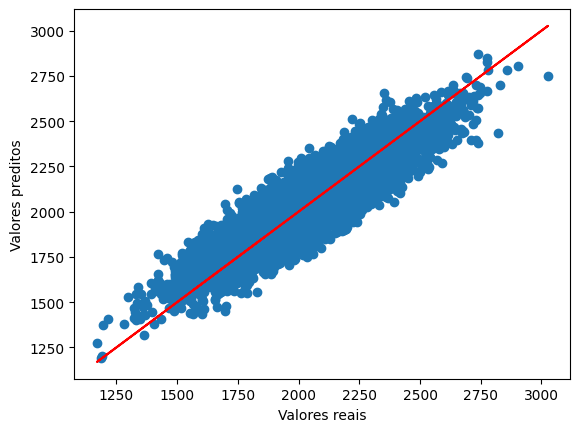

In [25]:
plt.scatter(y_test,y_pred)
plt.plot(y_test, y_test, color='red')
plt.xlabel('Valores reais')
plt.ylabel('Valores preditos')
plt.show()


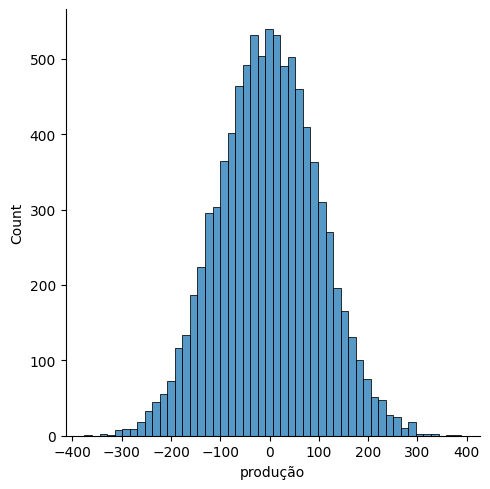

In [26]:
sns.displot((y_test-y_pred),bins=50)

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [28]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# imprimir os resultados
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

MAE: 80.87
MSE: 10183.38
RMSE: 100.91
R²: 0.82


In [29]:
accuracy = (lr.score(X_test, y_test))*100
print(f'Precisão do modelo: {accuracy:.4f}%')

Precisão do modelo: 81.6762%
